In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
import datetime
import time

In [21]:
def pnlstats(pnl):
    vol = np.std(pnl) * np.sqrt(250)
    annulret = np.mean(pnl) * 250
    ret = sum(pnl)
    sharpe = annulret / vol
    winratio = sum(np.array(pnl)>0)/len(pnl)
    maxdrawdown, cum, curmax  = 100000000, 0, 0
    for i in pnl:
        curmax = max(curmax, cum)
        cum += i
        maxdrawdown = min(maxdrawdown, cum - curmax)
    calmaratio = annulret/abs(maxdrawdown)
    status = {'volatility':vol, 'return':ret, 'sharpe':sharpe, 'winratio':winratio, 'maxdrawdown':maxdrawdown,'calmaratio':calmaratio}
    return pd.DataFrame(status,index = ['stats'])   

In [17]:
indexes = pd.read_csv('ThreeIndexAnalysis.csv')

In [26]:
indexes.columns

Index(['smallcap', 'lowpb', 'lowprice', 'total'], dtype='object')

In [32]:
covmat = np.corrcoef(np.transpose(indexes))
covmat

array([[ 1.        ,  0.84981626,  0.87094158,  0.9433951 ],
       [ 0.84981626,  1.        ,  0.95836688,  0.97026973],
       [ 0.87094158,  0.95836688,  1.        ,  0.97732525],
       [ 0.9433951 ,  0.97026973,  0.97732525,  1.        ]])

In [34]:
indexes['total'] = (indexes.smallcap + indexes.lowpb + indexes.lowprice)/3

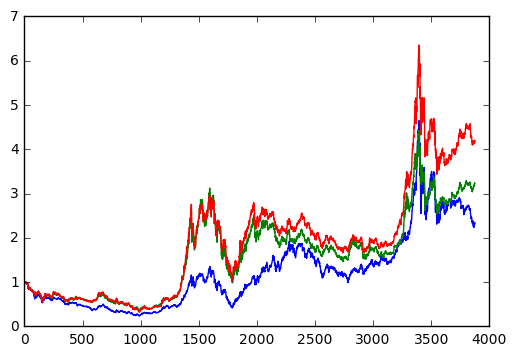

In [39]:
plt.figure()
plt.plot(np.cumprod(1+indexes['smallcap'].values))
plt.plot(np.cumprod(1+indexes['lowpb'].values))
plt.plot(np.cumprod(1+indexes['lowprice'].values))